# Instagram Account Classification – Fake vs. Genuine Accounts:

In [3]:
# Load your attached files
import pandas as pd
import numpy as np

instagram_df_train = pd.read_csv(r'C:\Users\hp\Downloads\train.csv')
instagram_df_test = pd.read_csv(r'C:\Users\hp\Downloads\test.csv')

instagram_df_train.head()

,profile_pic,username_num_ratio,fullname_words,fullname_num_ratio,name_equals_username,desc_length,external_url,is_private,posts,followers,follows,fake,fol_ratio,followers_bin
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0,1.047120,"(500, 1000]"
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0,5.140713,"(1000, 5000]"
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0,1.622449,"(100, 200]"
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0,0.635945,"(200, 500]"
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0,1.198413,"(100, 200]"


In [4]:
# Inspect quick shape and columns 
instagram_df_train.shape, instagram_df_test.shape

((576, 14), (120, 12))

In [5]:
# checking for null values:
instagram_df_train.isnull().sum()

profile_pic              0
username_num_ratio       0
fullname_words           0
fullname_num_ratio       0
name_equals_username     0
desc_length              0
external_url             0
is_private               0
posts                    0
followers                0
follows                  0
fake                     0
fol_ratio                0
followers_bin           52
dtype: int64

In [6]:
# Optional: rename columns for code convenience 
instagram_df_train = instagram_df_train.rename(columns={ 'profile pic': 'profile_pic', 'nums/length username': 'username_num_ratio', 'fullname words': 'fullname_words', 'nums/length fullname': 'fullname_num_ratio', 'name==username': 'name_equals_username', # if your header is 'name==username', adjust 'name==username': 'name_equals_username', # fallback 
                                    'description length': 'desc_length', 'external URL': 'external_url', 'private': 'is_private', '#posts': 'posts', '#followers': 'followers', '#follows': 'follows', 'fake': 'fake' })
instagram_df_train.columns

Index(['profile_pic', 'username_num_ratio', 'fullname_words',
       'fullname_num_ratio', 'name_equals_username', 'desc_length',
       'external_url', 'is_private', 'posts', 'followers', 'follows', 'fake',
       'fol_ratio', 'followers_bin'],
      dtype='object')

In [7]:
# Rename instagram_df_test columns to match instagram_df_train, only where names overlap
instagram_df_test = instagram_df_test.rename(columns={
    'profile pic': 'profile_pic',
    'nums/length username': 'username_num_ratio',
    'fullname words': 'fullname_words',
    'nums/length fullname': 'fullname_num_ratio',
    'name==username': 'name_equals_username',
    'description length': 'desc_length',
    'external URL': 'external_url',
    'private': 'is_private',
    '#posts': 'posts',
    '#followers': 'followers',
    '#follows': 'follows',
    'fake': 'fake'
})
instagram_df_test.columns

Index(['profile_pic', 'username_num_ratio', 'fullname_words',
       'fullname_num_ratio', 'name_equals_username', 'desc_length',
       'external_url', 'is_private', 'posts', 'followers', 'follows', 'fake'],
      dtype='object')

In [8]:
# This code creates a new feature (column) in both df_train and df_test called fol_ratiowhich stands for:Follower-to-Following Ratio
# High ratios often point to genuine accounts, and low ratios could indicate bots or spam.
instagram_df_train['fol_ratio'] = (instagram_df_train['followers'] / (instagram_df_train['follows'].replace(0, np.nan))).fillna(0) 
instagram_df_test['fol_ratio'] = (instagram_df_test['followers'] / (instagram_df_test['follows'].replace(0, np.nan))).fillna(0)

In [9]:
# Ensure target exists in train only 
# X_train:All input columns (except fake) from training data & y_train:The fake column (target labels) from training data
X_train = instagram_df_train.drop(columns=['fake']) 
y_train = instagram_df_train['fake'] 
X_test = instagram_df_test.drop(columns=['fake']) 
y_test = instagram_df_test['fake']

### Exploratory data analysis (EDA):

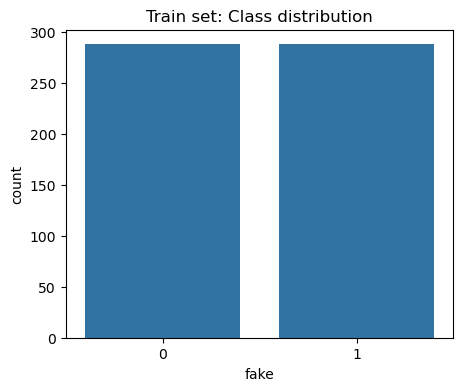

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class balance(fake/Geniune)
plt.figure(figsize=(5,4))
sns.countplot(x='fake', data=instagram_df_train)
plt.title('Train set: Class distribution')
plt.show()

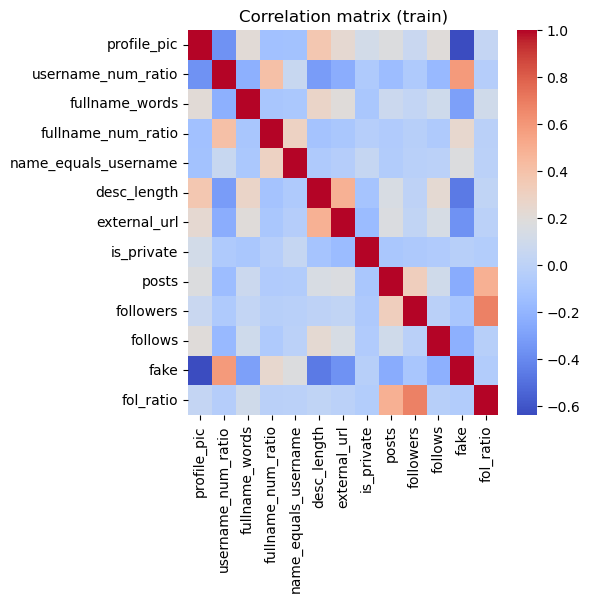

In [12]:
# Correlation heatmap (including fol_ratio)
plt.figure(figsize=(5,5))
sns.heatmap(instagram_df_train.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation matrix (train)')
plt.show()

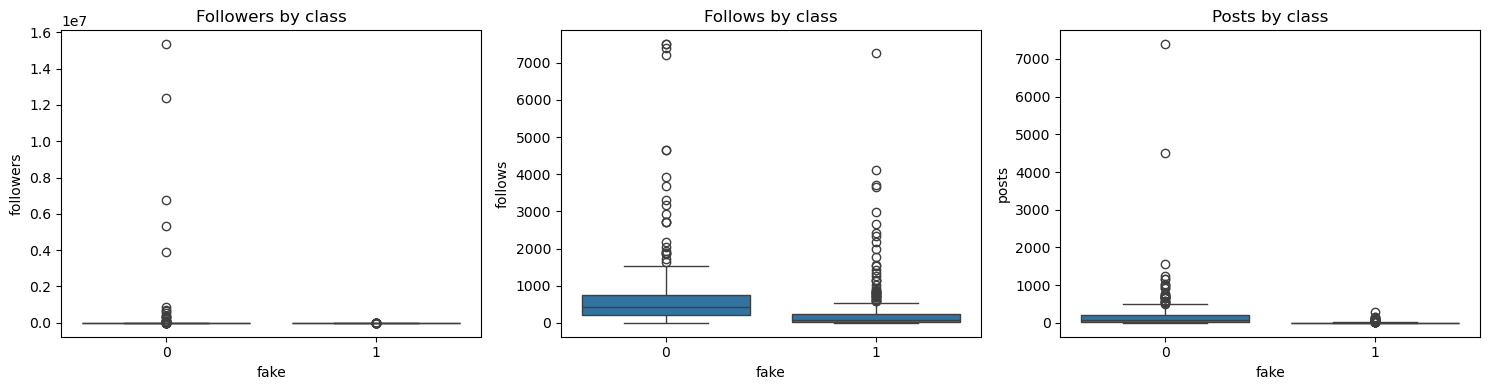

In [13]:
# Boxplots: followers, follows, posts by class
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(x='fake', y='followers', data=instagram_df_train, ax=axes[0])
axes[0].set_title('Followers by class')
sns.boxplot(x='fake', y='follows', data=instagram_df_train, ax=axes[1])
axes[1].set_title('Follows by class')
sns.boxplot(x='fake', y='posts', data=instagram_df_train, ax=axes[2])
axes[2].set_title('Posts by class')
plt.tight_layout(); plt.show()

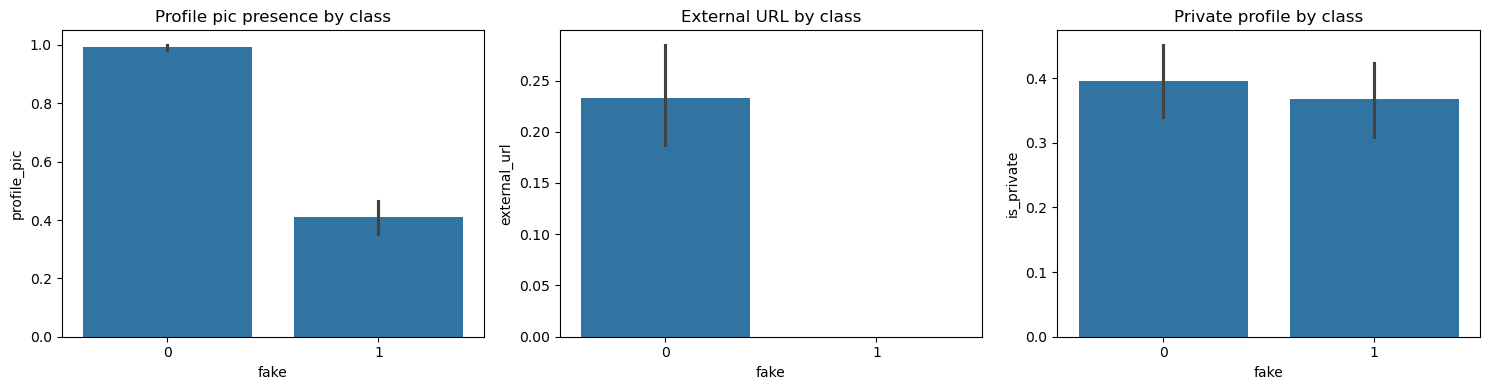

In [14]:
# Barplots: binary signals
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.barplot(x='fake', y='profile_pic', data=instagram_df_train, ax=axes[0])
axes[0].set_title('Profile pic presence by class')
sns.barplot(x='fake', y='external_url', data=instagram_df_train, ax=axes[1])
axes[1].set_title('External URL by class')
sns.barplot(x='fake', y='is_private', data=instagram_df_train, ax=axes[2])
axes[2].set_title('Private profile by class')
plt.tight_layout(); plt.show()
# Profile pic: Fake accounts often don't have a profile picture, unlike genuine ones.
# External URL: Real accounts are more likely to have a link in their bio than fake ones.
# Private profile: Both fake and genuine accounts are similarly likely to be private.

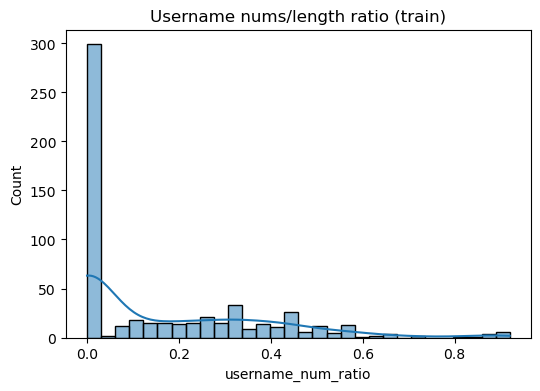

In [15]:
# Distribution examples
plt.figure(figsize=(6,4))
sns.histplot(instagram_df_train['username_num_ratio'], bins=30, kde=True)
plt.title('Username nums/length ratio (train)')
plt.show()

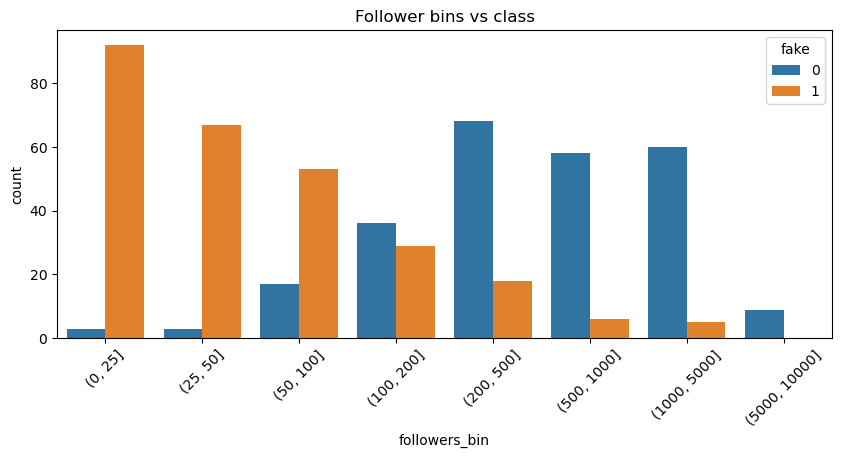

In [16]:
# Followers bins (quick view)
bins = [0, 25, 50, 100, 200, 500, 1000, 5000, 10000]
instagram_df_train['followers_bin'] = pd.cut(instagram_df_train['followers'], bins=bins)
plt.figure(figsize=(10,4))
sns.countplot(x='followers_bin', hue='fake', data=instagram_df_train)
plt.title('Follower bins vs class')
plt.xticks(rotation=45)
plt.show()

### Machine learning classification models
#### Train/test split, scaling, and baselines

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# Define features
num_features = ['username_num_ratio', 'fullname_words', 'fullname_num_ratio',
                'desc_length', 'posts', 'followers', 'follows', 'fol_ratio']
bin_features = ['profile_pic', 'name_equals_username', 'external_url', 'is_private']

# Some models benefit from scaling numeric features
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('bin', 'passthrough', bin_features)
    ],
    remainder='drop'
)

X = instagram_df_train[num_features + bin_features]
y = instagram_df_train['fake']

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'LogisticRegression': Pipeline([('prep', preprocess),
                                    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))]),
    'DecisionTree': Pipeline([('prep', preprocess),
                              ('clf', DecisionTreeClassifier(random_state=42))]),
    'RandomForest': Pipeline([('prep', preprocess),
                              ('clf', RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced'))])
}

results = []
for name, pipe in models.items():
    pipe.fit(X_tr, y_tr)
    y_pred = pipe.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    pr, rc, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='binary')
    results.append((name, acc, pr, rc, f1))

# Display comparison
import pandas as pd
cmp = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
print(cmp.sort_values('F1', ascending=False))


                Model  Accuracy  Precision    Recall        F1
2        RandomForest  0.931034   0.916667  0.948276  0.932203
0  LogisticRegression  0.913793   0.980000  0.844828  0.907407
1        DecisionTree  0.905172   0.898305  0.913793  0.905983


#### Evaluate on the provided test.csv:

In [21]:
best_model = models['RandomForest']  # choose based on validation
best_model.fit(X, y)

X_te = instagram_df_test[num_features + bin_features]
y_te = instagram_df_test['fake']

y_pred_te = best_model.predict(X_te)
print('Test classification report:\n', classification_report(y_te, y_pred_te))
print('Test confusion matrix:\n', confusion_matrix(y_te, y_pred_te))


Test classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        60
           1       0.90      0.95      0.93        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120

Test confusion matrix:
 [[54  6]
 [ 3 57]]


followers               0.258712
posts                   0.181177
username_num_ratio      0.130859
fol_ratio               0.109759
profile_pic             0.108778
desc_length             0.082573
follows                 0.071247
fullname_words          0.034404
is_private              0.008810
fullname_num_ratio      0.006085
external_url            0.005913
name_equals_username    0.001683
dtype: float64


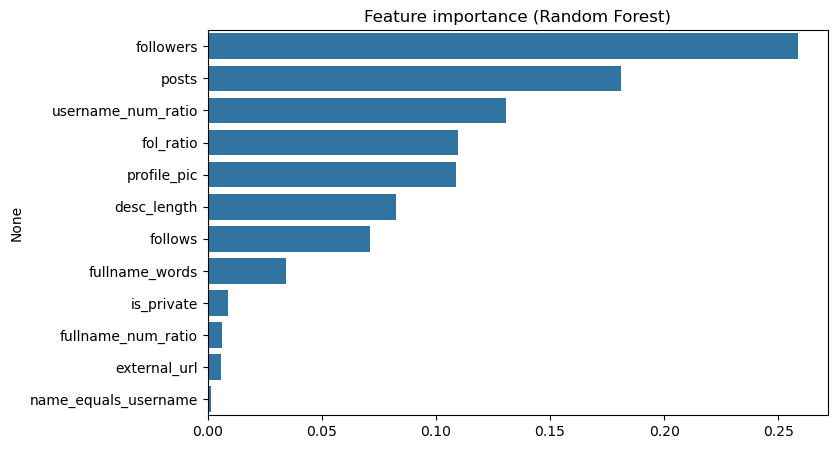

In [22]:
# Extract feature importances from RF
rf = best_model.named_steps['clf']
feat_names = num_features + bin_features
importances = pd.Series(rf.feature_importances_, index=feat_names).sort_values(ascending=False)
print(importances)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, orient='h')
plt.title('Feature importance (Random Forest)')
plt.show()


### Loading tha Cleaned Dataset in Mysql:

In [24]:
import pandas as pd
from sqlalchemy import create_engine

username = "root"
password = "MysqlSunita80"
host = "localhost"
port = "3306"
database = "InstagramFakeDetection_db"

engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)
table_name='instagram_accounts'
instagram_df_train.to_sql(table_name, engine, if_exists='replace', index=False)
print(f"data succsessfully inserted into the '{table_name}' table in the '{database}' database.")

data succsessfully inserted into the 'instagram_accounts' table in the 'InstagramFakeDetection_db' database.
